## dragon real estate - for price predict

In [1]:
import pandas as pd

In [2]:
housing_df=pd.read_csv("housing.csv")

In [3]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing_df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [5]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286663,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704697,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
from matplotlib import pyplot as plt

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'CHAS'}>,
        <AxesSubplot:title={'center':'CRIM'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'RM'}>],
       [<AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'ZN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

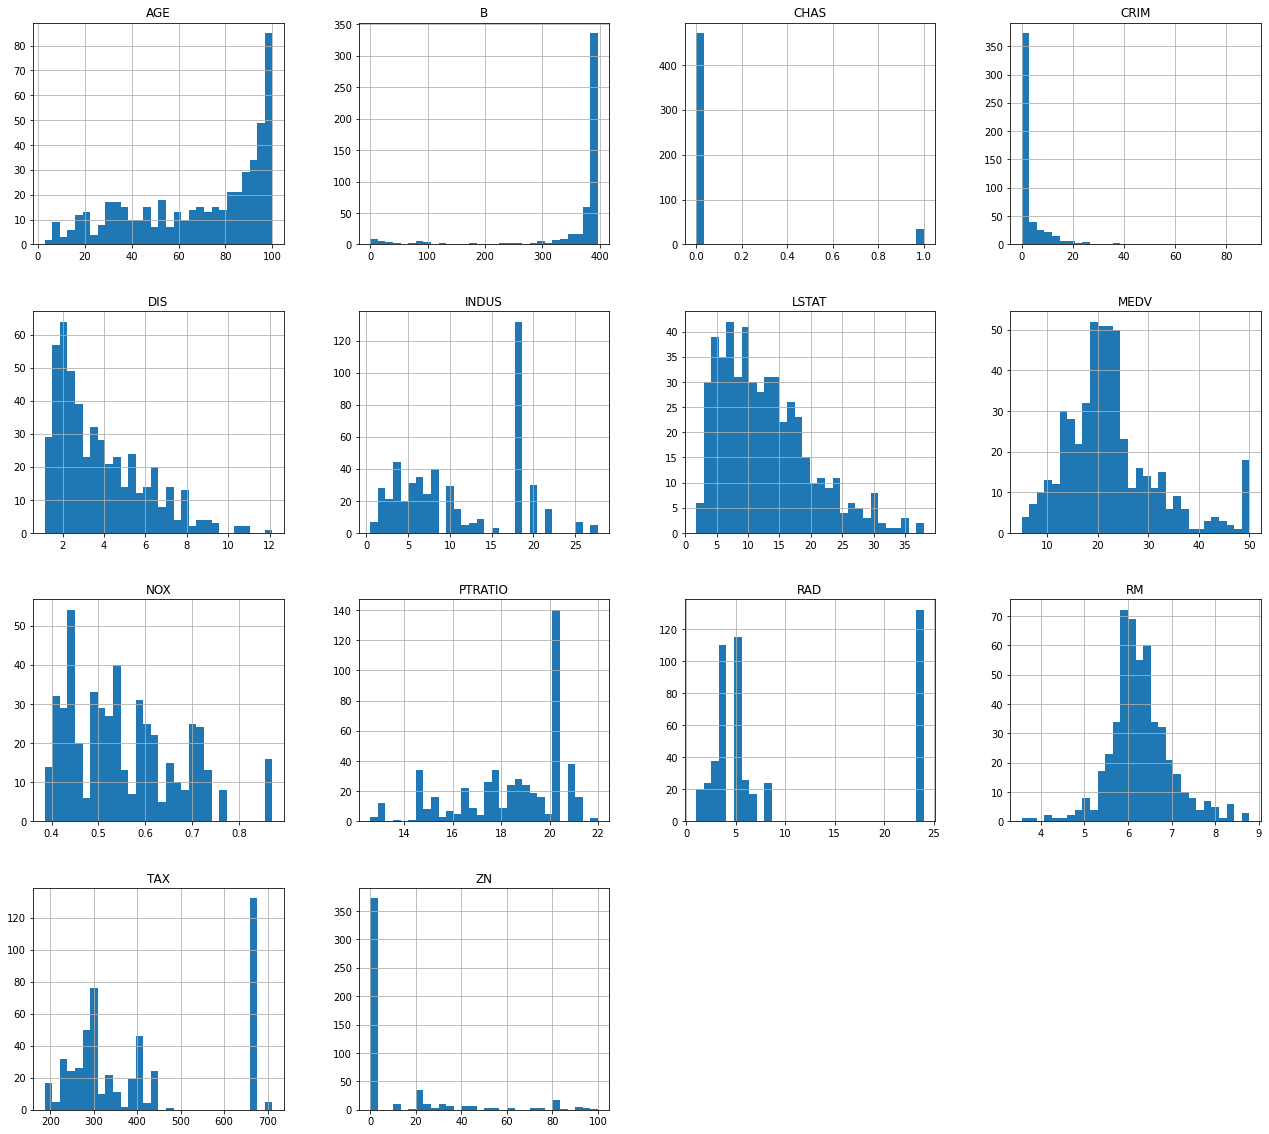

In [7]:
housing_df.hist(bins=30,figsize=(22,20))

In [8]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


## train-test splitting

In [9]:
import numpy as np
# for learning purpose
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
train_set,test_set=split_train_test(housing_df,0.2)

In [11]:
print(f'rows in train set :{len(train_set)} \nrows in test set: {len(test_set)}')

rows in train set :405 
rows in test set: 101


In [12]:
# above method using sklearn
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing_df,test_size=0.2,random_state=42)
print(f'rows in train set :{len(train_set)} \nrows in test set: {len(test_set)}')

rows in train set :404 
rows in test set: 102


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index , test_index in split.split(housing_df,housing_df['CHAS']):
    strat_train_set=housing_df.loc[train_index]
    strat_test_set=housing_df.loc[test_index]

In [14]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
# 95/7

In [18]:
# 376/28

In [19]:
housing_df = strat_train_set.copy()

## looking for correlation

In [20]:
corr_matrix = housing_df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680271
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

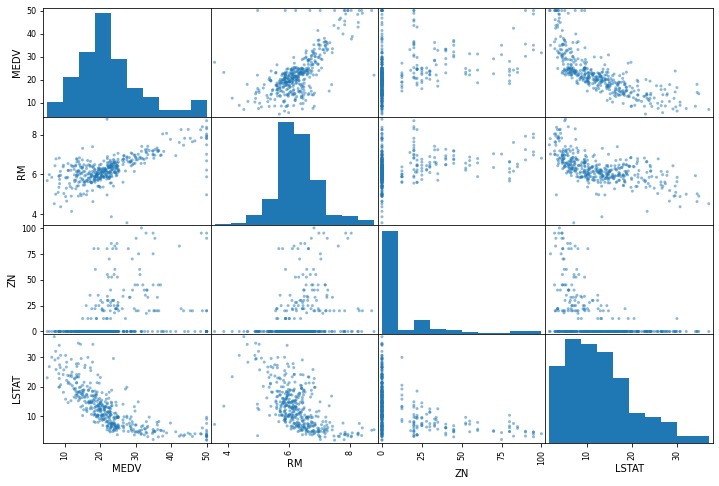

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing_df[attributes],figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

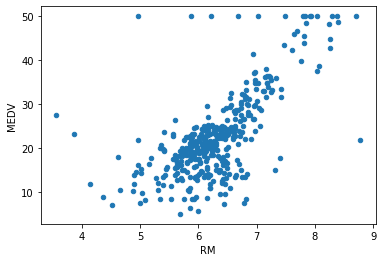

In [22]:
housing_df.plot(kind='scatter',x='RM',y='MEDV')

## TRYING OUT ATTRIBUTE COMBINATION

In [23]:
housing_df['TAXRM']=housing_df['TAX']/housing_df['RM']

In [24]:
housing_df['TAXRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [25]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [26]:
corr_matrix = housing_df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680271
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525446
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

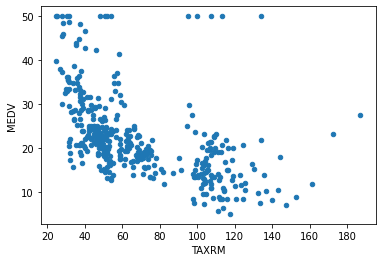

In [27]:
housing_df.plot(kind='scatter',x='TAXRM',y='MEDV')

In [28]:
housing_df=strat_train_set.drop('MEDV',axis=1)
housing_labels = strat_train_set['MEDV'].copy()

## missing attributes

In [29]:
# to take care of missing values:
#     set value to some value(0,mean or median)

In [30]:
median=housing_df['RM'].median()

In [31]:
median

6.211

In [32]:
housing_df['RM'].fillna(median)
# still main data unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [33]:
# above process ,,we can do it with sklearn class
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(strategy='median')
imputer.fit(housing_df)

SimpleImputer(strategy='median')

In [35]:
x=imputer.transform(housing_df)

In [36]:
housingdf_tr=pd.DataFrame(x,columns=housing_df.columns)

In [37]:
housingdf_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281512,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711292,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## scikit learn design 

primarily,,three types of objects-

1.Estimators - it estimates some parameters based on a dataset.eg.,imputer it has a fit method and transform method.
Fit method-fits the data set and calculates internal parameters

2.Transformers - transform method takes input and returns output based on the learnings from fit().it's also has a convenience function called fit_transform() which fits and then transforms.

3.Predictors - LinearRegression model is an example of predictor.fit() and predict() are two common functions.it's also gives score() function which will evalute and predictions.

## feature scaling

primarilly,two types of feature scaling methods:

1.Min-max scaling (normalization):

    (value - min)/(max - min)
    
    sklearn provides a class called MinMaxScaler for this
    
2.standardization:

    (value -mean)std
    
    sklearn provides a class called StandardScaler for this
    
    

## creating a pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
# ....add as many as you want in your pipeline
    ('std_scaler',StandardScaler()),
])

In [39]:
housing_num_tr=my_pipeline.fit_transform(housing_df)

In [40]:
housing_num_tr.shape

(404, 13)

## selecting desired model for dragon real Estates

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [42]:
some_data=housing_df.iloc[:5]

In [43]:
some_labels=housing_labels.iloc[:5]

In [44]:
prepared_data=my_pipeline.transform(some_data)

In [45]:
model.predict(prepared_data)

array([22.642, 25.231, 16.15 , 23.286, 23.36 ])

In [46]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## evaluting the model

In [47]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [48]:
rmse

1.1671995945699924

## using better evaluation technique-cross validation 

In [49]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)

In [50]:
rmse_scores

array([2.76979478, 2.7475187 , 4.36645466, 2.65176567, 3.26923969,
       2.61979702, 4.767817  , 3.28049947, 3.46679868, 3.18789405])

In [51]:
def print_scores(scores):
    print("scores :",scores)
    print("mean:",scores.mean())
    print("standard deviation:",scores.std())

In [52]:
print_scores(rmse_scores)

scores : [2.76979478 2.7475187  4.36645466 2.65176567 3.26923969 2.61979702
 4.767817   3.28049947 3.46679868 3.18789405]
mean: 3.3127579700588243
standard deviation: 0.6929024194713825


In [53]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

## testing the model on test data

In [55]:
x_test=strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)


In [56]:
print(final_predictions,list(y_test))

[24.559 11.576 25.46  22.073 18.238 15.074 20.013 14.274 31.398 40.4
 19.65  11.498 23.927 28.56  19.473 10.724 31.815 14.402 23.356 19.113
 19.771 18.121 17.238 22.075 18.114 30.776 16.256 32.562  8.886 33.627
 23.801 21.25  23.024 10.94  20.823 11.293 42.36  24.268 23.381 41.919
 23.747 29.671 20.4   21.054 19.41  33.731 44.364 20.037 20.433 22.002
 21.154 14.6   21.169 15.036 24.559 32.512 42.845 27.433 19.299 21.021
 47.453 10.094 18.61  25.02  14.845 32.907 19.319 18.058 19.312 34.2
 27.339 22.962 21.408 22.511 35.181 12.66  15.797 20.195 20.792 21.581
 22.206 21.739 14.167 23.161 20.728 21.04  13.942 21.248 21.794 22.588
 18.699 27.408  7.192 25.949 18.959 30.04  19.932 31.228 14.449 26.314
 21.092 20.147] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41

In [57]:
final_rmse

2.9088686922285514

In [60]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24424207, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])